<a href="https://colab.research.google.com/github/vyzkhd/Deep-Learning-Projects/blob/master/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
callbacks = myCallback()

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

W0802 13:10:33.871794 140253172729728 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
print(tf.__version__)

1.14.0


In [0]:
import matplotlib.pyplot as plt

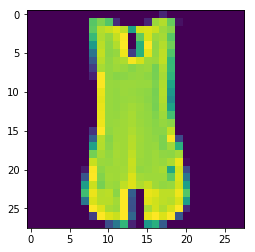

In [16]:
plt.imshow(train_images[4])

In [14]:
print(train_labels[4])

0


In [0]:
train_images = train_images/255.0
test_images = test_images/255.0


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss = 'sparse_categorical_crossentropy',metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [36]:
model.fit(train_images,train_labels,epochs=5,callbacks=[callbacks])

Epoch 1/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2274 - sparse_categorical_accuracy: 0.9146
Epoch 2/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2202 - sparse_categorical_accuracy: 0.9174
Epoch 3/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2127 - sparse_categorical_accuracy: 0.9195
Epoch 4/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2071 - sparse_categorical_accuracy: 0.9219
Epoch 5/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2017 - sparse_categorical_accuracy: 0.9244


In [37]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 62us/sample - loss: 0.3703 - sparse_categorical_accuracy: 0.8795


[0.3702576285839081, 0.8795]

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('loss')<0.18):
      self.model.stop_training = True
      